In [2]:
import os, sys
# Add project root (the folder that contains `topocurve`) to the Python path
sys.path.append(os.path.abspath(".."))

In [3]:
from topocurve.TopoCurve import TopoCurve
import numpy as np
import matplotlib.pyplot as plt
import tifffile

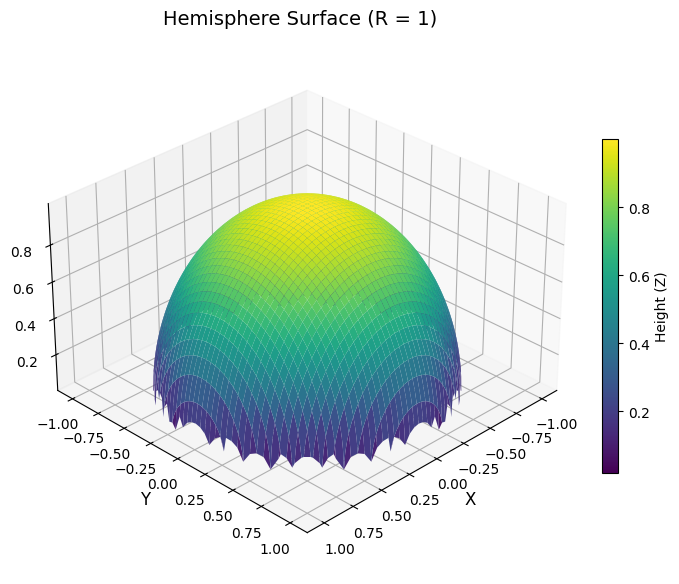


--- Curvature Averages ---
Mean K1: 1.006475
Mean K2: 0.999703
Mean KM: 1.003089
Mean KG: 1.006157
Expected (R=50): K1=K2≈0.02, KM≈0.02, KG≈0.0004


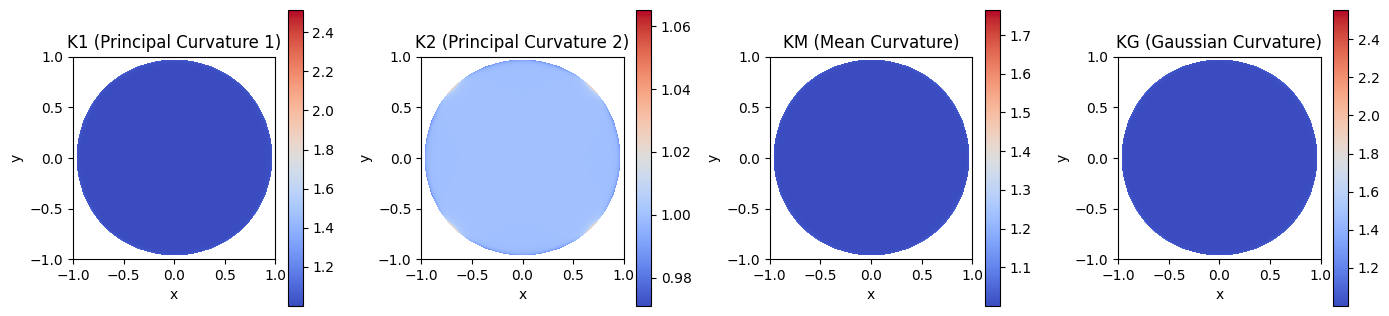


Interpretation:
 • Positive KM, KG => Basin (convex-up hemisphere)
 • If you flip Z = -sqrt(...), KM will become negative => Peak (dome).


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# 1. Create synthetic hemisphere surface
# ---------------------------------------------------------
R = 1                # radius of hemisphere
N = 200                        # grid size
x = np.linspace(-R, R, N)
y = np.linspace(-R, R, N)
X, Y = np.meshgrid(x, y)
Z = np.sqrt(np.clip(R**2 - X**2 - Y**2, 0, None))

# ---------------------------------------------------------
# Mask the rim (where Z = 0)
# ---------------------------------------------------------
mask = Z > 1e-6          # interior of the hemisphere
Z_masked = np.where(mask, Z, np.nan)  # replace rim with NaN

dx = x[1] - x[0]
dy = y[1] - y[0]

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ---------------------------------------------------------
# 1b. Plot hemisphere surface
# ---------------------------------------------------------
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.plot_surface(X, Y, Z_masked, cmap='viridis', linewidth=0, antialiased=True)

# Axis labels
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_zlabel('Z', fontsize=12)

# Title and colorbar
ax.set_title(f"Hemisphere Surface (R = {R})", fontsize=14, pad=10)
fig.colorbar(surf, ax=ax, shrink=0.6, label='Height (Z)')

# Aspect ratio and view angle
ax.set_box_aspect([1,1,0.6])
ax.view_init(elev=30, azim=45)

plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 2. Run CurveCalc
# ---------------------------------------------------------
topo = TopoCurve.__new__(TopoCurve)  # create without needing file init
K1, K2, KM, KG = topo.CurveCalc(Z_masked, dx, dy, kt=1e-6)

# ---------------------------------------------------------
# 3. Print summary statistics
# ---------------------------------------------------------
print("\n--- Curvature Averages ---")
print(f"Mean K1: {np.nanmean(K1):.6f}")
print(f"Mean K2: {np.nanmean(K2):.6f}")
print(f"Mean KM: {np.nanmean(KM):.6f}")
print(f"Mean KG: {np.nanmean(KG):.6f}")
print(f"Expected (R=50): K1=K2≈0.02, KM≈0.02, KG≈0.0004")

# ---------------------------------------------------------
# 4. Plot curvature maps
# ---------------------------------------------------------
fig, axs = plt.subplots(1, 4, figsize=(14, 4))
titles = ["K1 (Principal Curvature 1)",
          "K2 (Principal Curvature 2)",
          "KM (Mean Curvature)",
          "KG (Gaussian Curvature)"]

data = [K1, K2, KM, KG]
for ax, dat, title in zip(axs, data, titles):
    im = ax.imshow(dat, extent=[x.min(), x.max(), y.min(), y.max()],
                   cmap='coolwarm', origin='lower')
    ax.set_title(title)
    plt.colorbar(im, ax=ax, shrink=0.8)
    ax.set_xlabel("x")
    ax.set_ylabel("y")

plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 5. Interpretation hint
# ---------------------------------------------------------
print("\nInterpretation:")
print(" • Positive KM, KG => Basin (convex-up hemisphere)")
print(" • If you flip Z = -sqrt(...), KM will become negative => Peak (dome).")


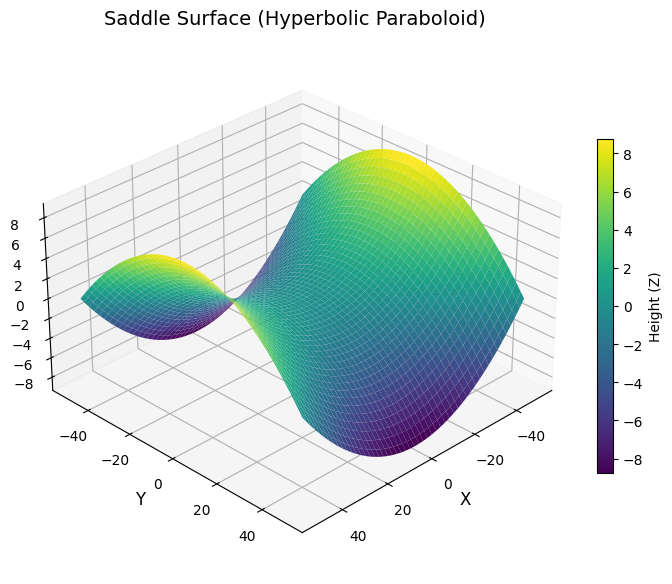


--- Curvature Averages ---
Mean K1: 0.006597
Mean K2: -0.006597
Mean KM: -0.000000
Mean KG: -0.000044
Expected (Saddle): K1>0, K2<0, KM≈0, KG<0


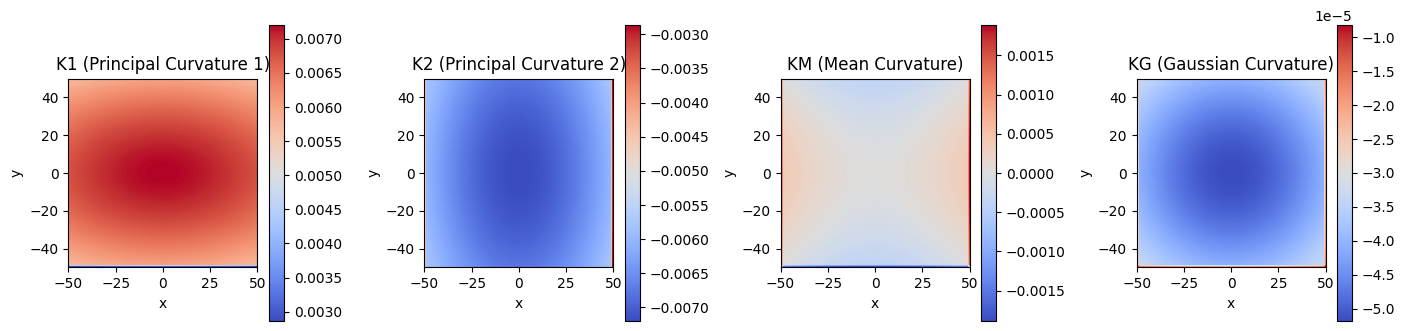


Interpretation:
 • K1 > 0, K2 < 0 => Opposite curvatures → saddle shape.
 • Mean curvature (KM) ≈ 0 → surface is minimal.
 • Gaussian curvature (KG) < 0 → hyperbolic geometry.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ---------------------------------------------------------
# 1. Create synthetic saddle surface (hyperbolic paraboloid)
# ---------------------------------------------------------
R = 50        # characteristic scale
N = 200       # grid size
x = np.linspace(-R, R, N)
y = np.linspace(-R, R, N)
X, Y = np.meshgrid(x, y)

# Saddle surface
a = R / 3
b = R / 3
Z = (X**2 / a**2) - (Y**2 / b**2)

dx = x[1] - x[0]
dy = y[1] - y[0]

# ---------------------------------------------------------
# 1b. Plot saddle surface
# ---------------------------------------------------------
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap='viridis', linewidth=0, antialiased=True)

ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_zlabel('Z', fontsize=12)
ax.set_title("Saddle Surface (Hyperbolic Paraboloid)", fontsize=14, pad=10)
fig.colorbar(surf, ax=ax, shrink=0.6, label='Height (Z)')
ax.set_box_aspect([1,1,0.6])
ax.view_init(elev=30, azim=45)

plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 2. Run CurveCalc
# ---------------------------------------------------------
topo = TopoCurve.__new__(TopoCurve)  # create without __init__
K1, K2, KM, KG = topo.CurveCalc(Z, dx, dy, kt=1e-6)

# ---------------------------------------------------------
# 3. Print summary statistics
# ---------------------------------------------------------
print("\n--- Curvature Averages ---")
print(f"Mean K1: {np.nanmean(K1):.6f}")
print(f"Mean K2: {np.nanmean(K2):.6f}")
print(f"Mean KM: {np.nanmean(KM):.6f}")
print(f"Mean KG: {np.nanmean(KG):.6f}")
print(f"Expected (Saddle): K1>0, K2<0, KM≈0, KG<0")

# ---------------------------------------------------------
# 4. Plot curvature maps
# ---------------------------------------------------------
fig, axs = plt.subplots(1, 4, figsize=(14, 4))
titles = ["K1 (Principal Curvature 1)",
          "K2 (Principal Curvature 2)",
          "KM (Mean Curvature)",
          "KG (Gaussian Curvature)"]

data = [K1, K2, KM, KG]
for ax, dat, title in zip(axs, data, titles):
    im = ax.imshow(dat, extent=[x.min(), x.max(), y.min(), y.max()],
                   cmap='coolwarm', origin='lower')
    ax.set_title(title)
    plt.colorbar(im, ax=ax, shrink=0.8)
    ax.set_xlabel("x")
    ax.set_ylabel("y")

plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 5. Interpretation
# ---------------------------------------------------------
print("\nInterpretation:")
print(" • K1 > 0, K2 < 0 => Opposite curvatures → saddle shape.")
print(" • Mean curvature (KM) ≈ 0 → surface is minimal.")
print(" • Gaussian curvature (KG) < 0 → hyperbolic geometry.")
